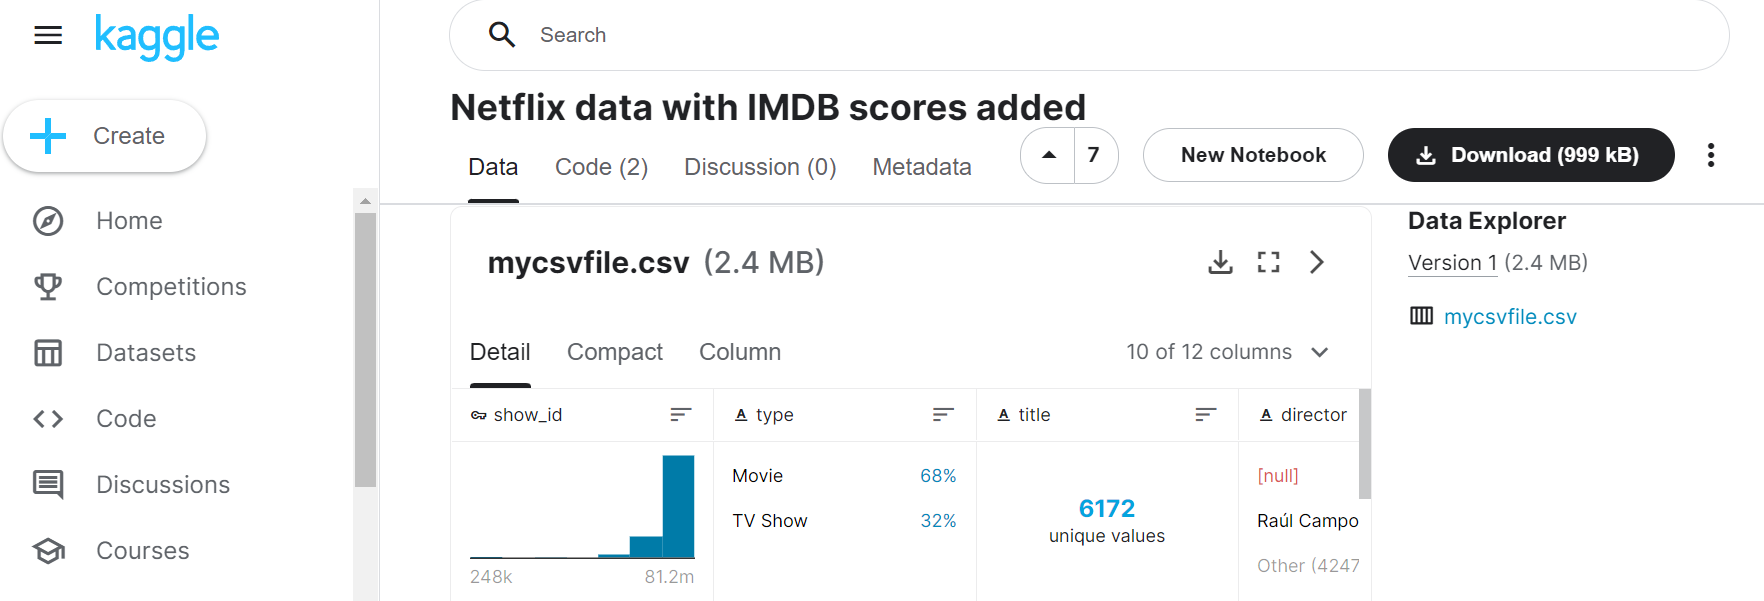

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("mycsvfile.csv",header=0)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,4.1,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,5.2,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,8.2,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,6.4,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,5.7,99 min,Comedies,When nerdy high schooler Dani finally attracts...


# 1.看原始資料有空白的欄位
# 2.備份

In [3]:
df.isnull().sum()
df_copy=df.copy()

# 去重檢查

In [4]:
df_copy.drop_duplicates(subset="show_id",keep="first",inplace=True)
len(df_copy)

6234

# 處理date_added的空白
### 使用【前往後 遞補】fillna(method="ffill")

In [5]:
df_copy["date_added"]=df_copy["date_added"].fillna(method="ffill")
df_copy.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast               0
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

# 處理director的空白
### 以unknown取代 fillna(value="unknown")

In [6]:
df_copy["director"]=df_copy["director"].fillna(value="unknown")
df_copy.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# country會有單一，或多個地方
### 需要拆開 再依每個國家出現次數做計算，以利製圖使用


In [7]:
df_copy['country']=df_copy.loc[df_copy["country"]!="none",["country"]]  #挑出不是none的資料
countrylist = df_copy['country'].str.split(",",expand=True) #依"逗號"區隔，依資料數去新增一行expand=True
countrylist=countrylist.stack().str.strip()  #堆疊橫成"行",將每格的前後空格去除,以利資料數計算
countrylist=countrylist.dropna()  #去除空值

# 每個國家出現次數
countrylist.value_counts()

United States     2610
India              838
United Kingdom     602
Canada             318
France             271
                  ... 
Liechtenstein        1
Latvia               1
Uganda               1
Montenegro           1
Cyprus               1
Length: 111, dtype: int64

# 處理List_in欄位

In [8]:
listed_in=df_copy["listed_in"].str.split(",",expand=True)
listed_in=listed_in.stack().str.strip()
listed_in.value_counts()

International Movies            1927
Dramas                          1623
Comedies                        1113
International TV Shows          1001
Documentaries                    668
TV Dramas                        599
Action & Adventure               597
Independent Movies               552
TV Comedies                      436
Thrillers                        392
Children & Family Movies         378
Romantic Movies                  376
Crime TV Shows                   363
Kids' TV                         328
Stand-Up Comedy                  281
Docuseries                       279
Romantic TV Shows                278
Horror Movies                    262
Music & Musicals                 243
British TV Shows                 210
Sci-Fi & Fantasy                 193
Sports Movies                    157
Reality TV                       153
Korean TV Shows                  132
TV Action & Adventure            126
Spanish-Language TV Shows        117
Anime Series                     117
C

## 處理rating=0  以"平均值"取代 (loc取代、mean()平均)
## 所有評分四捨五入去掉小數位 round(0)

In [9]:
df_copy.loc[df_copy["rating"]==0,["rating"]]=df_copy["rating"].mean()
df_copy["rating"]=df_copy["rating"].round(0)

----
# 資料視覺化

In [10]:
#以評分表作為標的
df_rate=df_copy.groupby("rating") 

#再用影片類型依評分做分類計算，結果會是mutipleindex，unstack回一個Dataframe就可以直接視覺化
df_typerate=df_rate["type"].value_counts().unstack()  
df_typerate

type,Movie,TV Show
rating,,
2.0,9,1
3.0,34,8
4.0,193,28
5.0,449,71
6.0,1452,403
7.0,1282,456
8.0,793,842
9.0,49,157
10.0,4,3


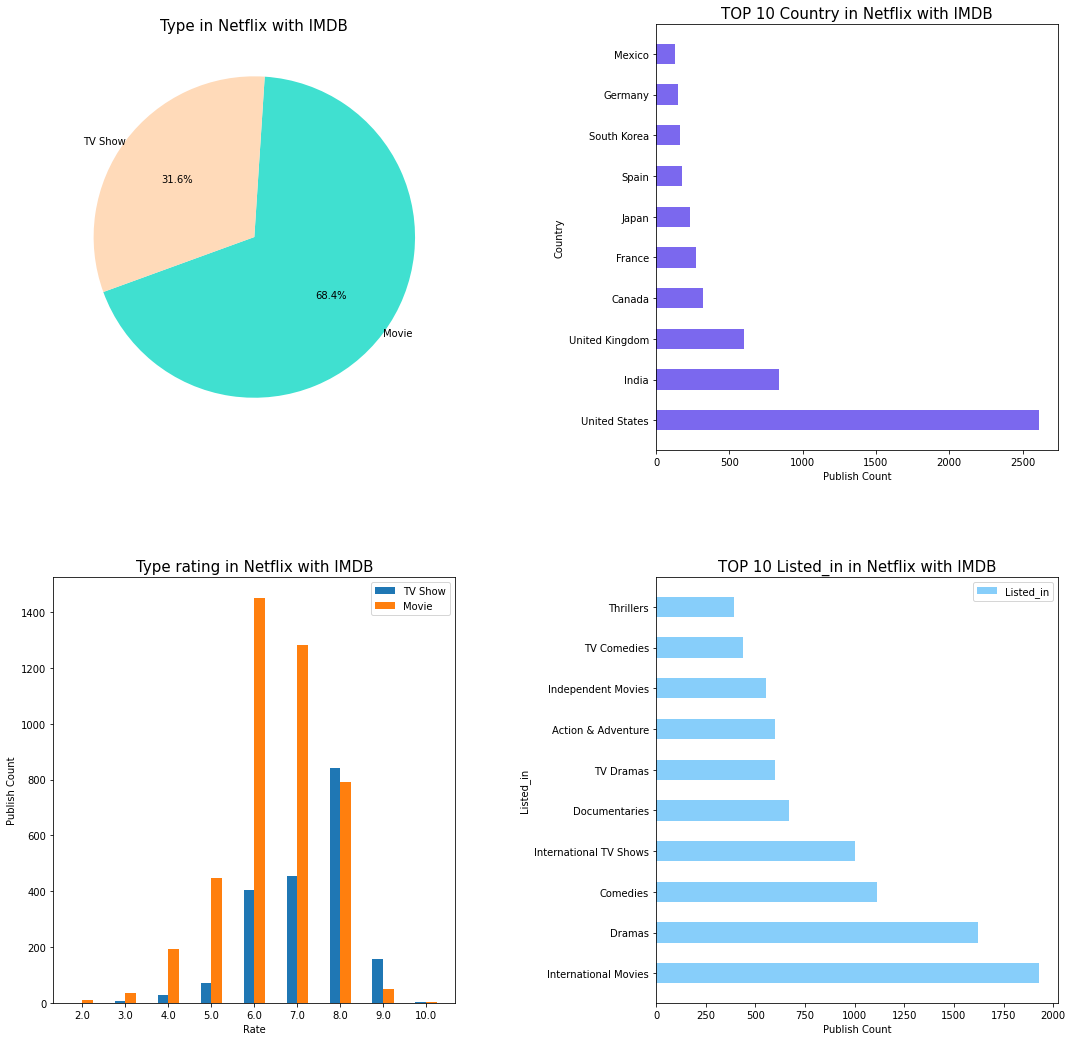

In [11]:
plt.figure(figsize=[18,18])
plt.subplots_adjust(hspace=0.3,wspace=0.5)

plt.subplot(221)
labels=list(df_copy["type"].unique())  
sizes=list(df_copy.groupby("type")["show_id"].count())  
colors=["turquoise","peachpuff"]
explode=(0,0)

plt.pie(sizes,
       explode=explode,
       labels=labels,
       colors=colors,
       labeldistance=1,
       autopct="%2.1f%%",
       pctdistance=0.6,
       shadow=False,
       startangle=200)

plt.title("Type in Netflix with IMDB",fontsize=15)

################
plt.subplot(222)

labels=list(countrylist.value_counts().head(10).index)  
sizes=list(countrylist.value_counts().head(10))  

plt.barh(labels,sizes,color="mediumslateblue",height=0.5)

plt.tick_params(axis="both",labelsize=10,color="black")

plt.ylabel("Country",fontsize=10)#
plt.xlabel("Publish Count",fontsize=10)

plt.title("TOP 10 Country in Netflix with IMDB",fontsize=15)

################
plt.subplot(223)

width=0.25
ratelist=list(np.sort(df_copy["rating"].unique()))
list1=[x-width/2 for x in range(len(ratelist))]
list2=[x+width/2 for x in range(len(ratelist))]
tvshow=list(df_typerate["TV Show"])
movie=list(df_typerate["Movie"])

plt.bar(list1,tvshow,width=0.25,label="TV Show")
plt.bar(list2,movie,width=0.25,label="Movie")
plt.xticks(range(len(ratelist)),labels=ratelist)

plt.xlabel("Rate",fontsize=10)
plt.ylabel("Publish Count",fontsize=10)
plt.title("Type rating in Netflix with IMDB",fontsize=15)

plt.legend()

################
plt.subplot(224)

listedin=list(listed_in.value_counts().head(10).index)
sizes=list(listed_in.value_counts().head(10))

plt.barh(listedin,sizes,height=0.5,color="lightskyblue",label="Listed_in")

plt.ylabel("Listed_in",fontsize=10)#
plt.xlabel("Publish Count",fontsize=10)

plt.title("TOP 10 Listed_in in Netflix with IMDB",fontsize=15)

plt.legend()